In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import rcParams
from scipy.interpolate import CubicSpline
rcParams.update({'figure.autolayout': True})
import os
import IPython

In [3]:
def q1_f(x):
    y = x**3-7*x**2+14*x-5
    return y
def q1_df(x):
    y = 3*x**2 - 14*x+14
    return y

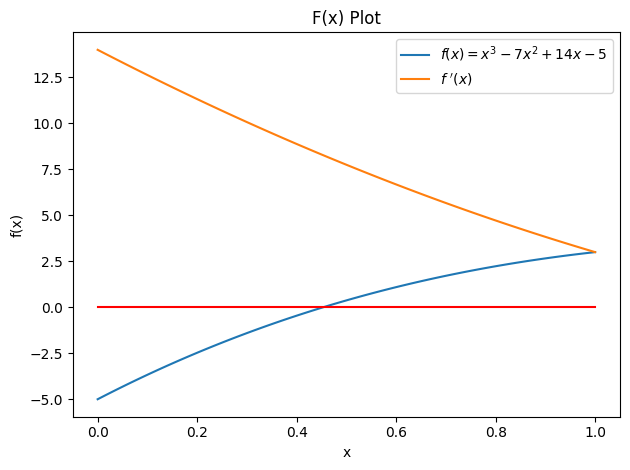

In [4]:
x_val = np.linspace(0,1,100)
y_val = q1_f(x_val)
dy_val = q1_df(x_val)

plt.plot(x_val,y_val, label = r"$f(x) = x^3 - 7x^2 + 14x-5$")
plt.plot(x_val,dy_val, label = r"$f\ '(x)$")
plt.plot(x_val,np.zeros(100), c = "r")
plt.title("F(x) Plot")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

In [5]:
#Root Finding with bisection function, ends when tolerance < e-8
#input: 
#   f: a function of x 
#   x0: initial guess 1 for x
#   x1: initial guess 2 for x, f(x0) and f(x1) should be different sign
#output: 
#   x: best guess for root location
#   dt: data table of each step, with columnes "x_left", "x_right", "x_new", "y_new", "err".
#       (err is relative error or tolerance.)
#   step: number of iterations
def bisection(f,x0,x1):
    if (f(x0)*f(x1)) > 0 :
        raise("Invalid initial values")
    df = pd.DataFrame(columns=["x_left", "x_right", "x_new", "y_new", "err"])
    err = 1
    step = 0
    if f(x0) <0:
        xl = x0
        xr = x1
    else:
        xl = x1
        xr = x0
    
    while err > 1e-8:
        xn = (xl+xr)/2
        if xn < 1e-12: # in case x is too close to zero
            err = NaN
        else:
            err = np.abs((xl-xr)/(2*xn))
        yn = f(xn)
        df.loc[step] = [xl,xr,xn,yn,err]

        if np.abs(yn) < 1e-12:
            print("Approximate root found!") # in case we get root early
            step +=1
            break
        if yn <0:
            xl = xn
        else:
            xr = xn

        step+=1
    return df['x_new'][step-1],df, step


    

In [6]:
xn, df, step = bisection(q1_f,0,1)
df[-5:]

,x_left,x_right,x_new,y_new,err
23,0.453182,0.453182,0.453182,-3.234082e-07,1.315248e-07
24,0.453182,0.453182,0.453182,-7.689601e-08,6.576241e-08
25,0.453182,0.453182,0.453182,4.636010e-08,3.288120e-08
26,0.453182,0.453182,0.453182,-1.526795e-08,1.644060e-08
27,0.453182,0.453182,0.453182,1.554607e-08,8.220301e-09


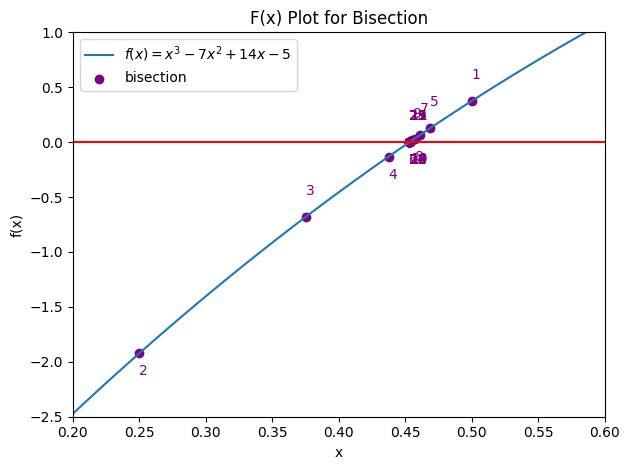

In [7]:
plt.plot(x_val,y_val, label = r"$f(x) = x^3 - 7x^2 + 14x-5$")
plt.scatter(df["x_new"],df["y_new"],c = "purple", label = "bisection")
for i in range(len(df)):
    plt.text(df["x_new"][i],df["y_new"][i]+0.2*(-1)**(i %2), str(i+1),color = "purple")
plt.plot(x_val,np.zeros(100), c = "r")
plt.title("F(x) Plot for Bisection")
plt.xlim(0.2,0.6)
plt.ylim(-2.5,1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

In [8]:
#Root Finding with Newton Raphson, ends when tolerance < e-8
#input: 
#   f: a function of x 
#   df: derivative for f, a function of x
#   x0: initial guess for x
#output: 
#   x: best guess for root location
#   dt: data table of each step, with columnes "x_ini", "x_new", "y_new", "err".
#       (err is relative error or tolerance.)
#   step: number of iterations
def NR_root(f,df,x0):

    dt_N = pd.DataFrame(columns=["x_ini","x_new", "y_new", "err"])
    err = 1
    step = 0
    
    while err > 1e-8:
        xn = x0 - f(x0)/df(x0)
        if xn < 1e-12: # in case x is too close to zero
            err = np.NAN
        else:
            err = np.abs((f(x0)/df(x0))/xn)
            
        yn = f(xn)
        dt_N.loc[step] = [x0,xn,yn,err]
        if np.abs(yn) < 1e-12: # in case we get root early
            step +=1
            break
        x0 = xn


        step+=1
    return dt_N, dt_N['x_new'][step-1], step

      x_ini     x_new         y_new           err
0  0.000000  0.357143 -8.473032e-01  1.000000e+00
1  0.357143  0.447448 -4.761133e-02  2.018229e-01
2  0.447448  0.453159 -1.843597e-04  1.260326e-02
3  0.453159  0.453182 -2.801860e-09  4.918040e-05
4  0.453182  0.453182  0.000000e+00  7.474562e-10


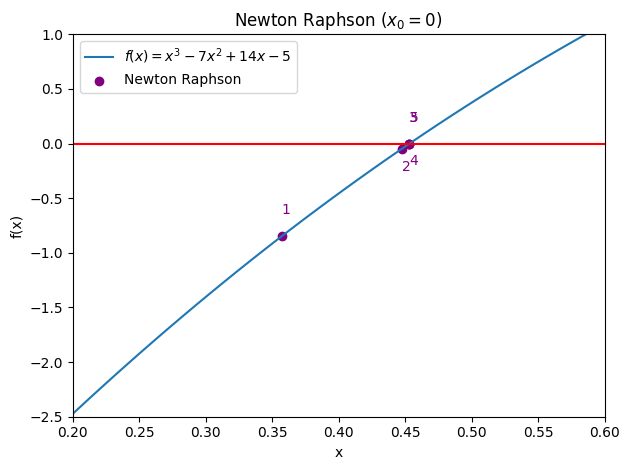

In [9]:
x0 = 0
dt_N,xn, step = NR_root(q1_f,q1_df,x0)
print(dt_N[-5:])

plt.plot(x_val,y_val, label = r"$f(x) = x^3 - 7x^2 + 14x-5$")
plt.scatter(dt_N["x_new"],dt_N["y_new"], c = "purple",label = "Newton Raphson")
for i in range(len(dt_N)):
    plt.text(dt_N["x_new"][i],dt_N["y_new"][i]+0.2*(-1)**(i %2), str(i+1),color = "purple")
plt.plot(x_val,np.zeros(100), c = "r")
plt.title("Newton Raphson $(x_0 =  %.i)$"%x0)
plt.xlim(0.2,0.6)
plt.ylim(-2.5,1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

In [10]:
min(0.2,np.min(dt_N["x_new"]))

0.2

Text(0.5, 0.98, 'Different initial value for Newton Raphson')

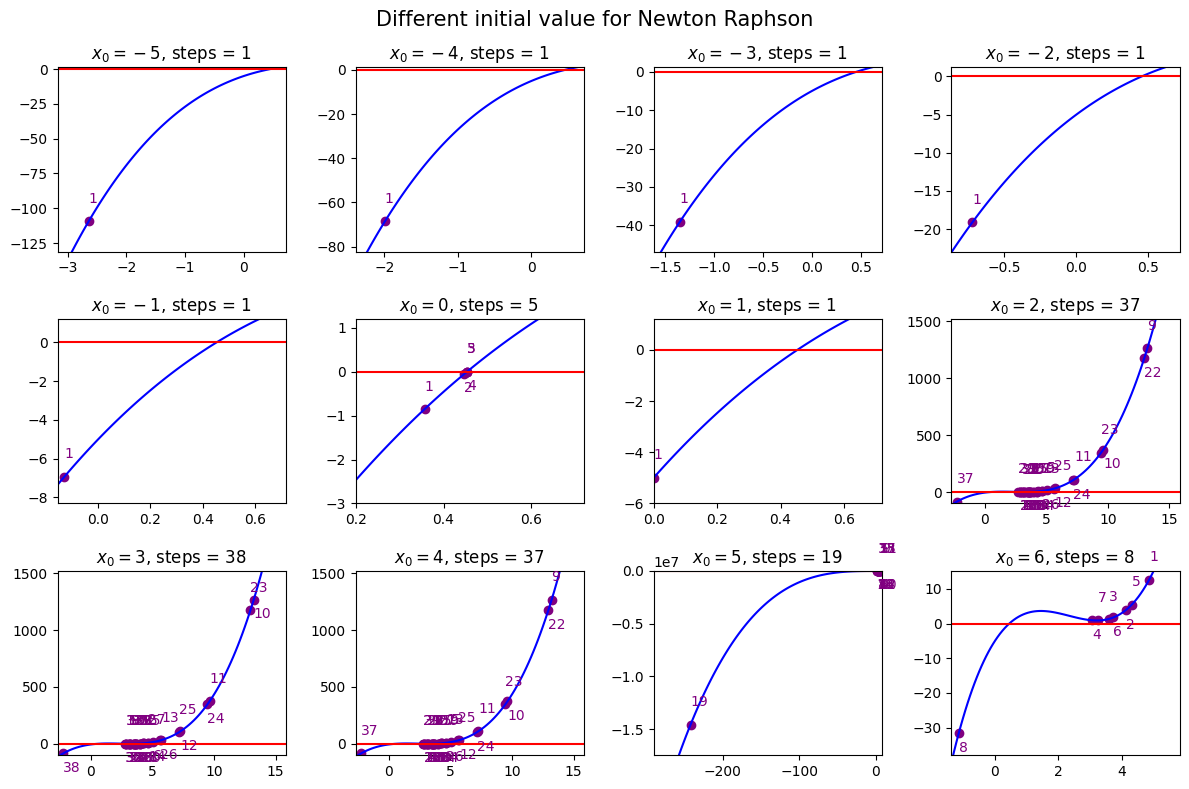

In [18]:
x_array = np.linspace(-5,6,12)
fig, ax = plt.subplots(3,4,figsize=(12, 8))
#fig.tight_layout()
for i in range(len(x_array)):
    ax_y = i%4
    ax_x = i//4
    x0 = x_array[i]
    dt_N,xn, step = NR_root(q1_f,q1_df,x0)
    x_range = [min(0.2,np.min(dt_N["x_new"])*1.2),max(0.6,np.max(dt_N["x_new"]))*1.2]
    y_range = [min(-2.5,np.min(dt_N["y_new"]))*1.2,max(1.0,np.max(dt_N["y_new"]))*1.2]
    x_scale = np.abs(x_range[0] - x_range[1])
    y_scale = np.abs(y_range[0] - y_range[1])

    x_val = np.linspace(x_range[0],x_range[1],100)
    y_val = q1_f(x_val)
    
    ax[ax_x,ax_y].plot(x_val,y_val, c ="b", label = r"$f(x) = x^3 - 7x^2 + 14x-5$")
    ax[ax_x,ax_y].plot(x_val,np.zeros(100), c = "r")
    ax[ax_x,ax_y].scatter(dt_N["x_new"],dt_N["y_new"], c = "purple",label = "Newton Raphson")
    for j in range(len(dt_N)):
        ax[ax_x,ax_y].text(dt_N["x_new"][j],dt_N["y_new"][j]+y_scale*0.1*(-1)**(j %2), str(j+1),color = "purple")


    ax[ax_x,ax_y].set_xlim(x_range[0],x_range[1])
    ax[ax_x,ax_y].set_ylim(y_range[0],y_range[1])
    ax[ax_x,ax_y].set_title("$x_0 = %.i$, steps = %.i "%(x_array[i],step))

fig.suptitle('Different initial value for Newton Raphson', fontsize=15)

In [12]:
2/4

0.5